In [1]:
import pandas as pd
import numpy as np

# Load dataset from Excel file
df = pd.read_excel("thesis.xlsx")

# Display basic info about dataset
df.info()

# Show first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148491 entries, 0 to 148490
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PATID               148491 non-null  int64         
 1   BIRTH_DATE          148491 non-null  datetime64[ns]
 2   BIRTH_TIME          148491 non-null  object        
 3   SEX                 148489 non-null  object        
 4   HISPANIC            148241 non-null  object        
 5   MARITAL_STATUS      147737 non-null  object        
 6   PREFERRED_LANGUAGE  147342 non-null  object        
 7   DIAGNOSIS           148491 non-null  object        
 8   AGE                 148491 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 10.2+ MB


,PATID,BIRTH_DATE,BIRTH_TIME,SEX,HISPANIC,MARITAL_STATUS,PREFERRED_LANGUAGE,DIAGNOSIS,AGE
0,3052085,1993-12-10 06:00:00,06:00:00,F,N,Single,ENG,CUD,31
1,617820,1985-10-12 06:00:00,06:00:00,F,N,Single,ENG,"CUD, Depression, Anxiety",39
2,2196185,1977-06-17 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Anxiety",47
3,2673434,1988-04-28 06:00:00,06:00:00,M,N,Married,ENG,CUD,36
4,128923,1962-05-15 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Depression, Anxiety",62


In [3]:
# Check missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 PATID                    0
BIRTH_DATE               0
BIRTH_TIME               0
SEX                      2
HISPANIC               250
MARITAL_STATUS         754
PREFERRED_LANGUAGE    1149
DIAGNOSIS                0
AGE                      0
dtype: int64


In [5]:
# Using df.assign() to update multiple columns at once
df = df.assign(
    SEX=df["SEX"].fillna("Unknown"),
    HISPANIC=df["HISPANIC"].fillna("Unknown"),
    MARITAL_STATUS=df["MARITAL_STATUS"].fillna("Unknown"),
    PREFERRED_LANGUAGE=df["PREFERRED_LANGUAGE"].fillna("Unknown"),
    DIAGNOSIS=df["DIAGNOSIS"].fillna("No Diagnosis")
)

In [7]:
print(df.isnull().sum())  # Should print all 0s


PATID                 0
BIRTH_DATE            0
BIRTH_TIME            0
SEX                   0
HISPANIC              0
MARITAL_STATUS        0
PREFERRED_LANGUAGE    0
DIAGNOSIS             0
AGE                   0
dtype: int64


In [9]:
# Create binary column: 1 if 'CUD' is in DIAGNOSIS, otherwise 0
df["CUD_Diagnosis"] = df["DIAGNOSIS"].apply(lambda x: 1 if "CUD" in str(x) else 0)

# Verify changes
df[["DIAGNOSIS", "CUD_Diagnosis"]].head()

,DIAGNOSIS,CUD_Diagnosis
0,CUD,1
1,"CUD, Depression, Anxiety",1
2,"CUD, Anxiety",1
3,CUD,1
4,"CUD, Depression, Anxiety",1


In [11]:
# Define key psychiatric disorders
psych_disorders = ["Depression", "Anxiety", "Schizophrenia"]

# Create binary columns for each disorder (1 if present, 0 otherwise) using df.assign()
df = df.assign(**{disorder: df["DIAGNOSIS"].apply(lambda x: 1 if disorder in str(x) else 0) for disorder in psych_disorders})

# Verify changes
df[["DIAGNOSIS", "CUD_Diagnosis", "Depression", "Anxiety", "Schizophrenia"]].head()


,DIAGNOSIS,CUD_Diagnosis,Depression,Anxiety,Schizophrenia
0,CUD,1,0,0,0
1,"CUD, Depression, Anxiety",1,1,1,0
2,"CUD, Anxiety",1,0,1,0
3,CUD,1,0,0,0
4,"CUD, Depression, Anxiety",1,1,1,0


/var/folders/cg/f8fbrhz54j31_b4ng4zd8zkh0000gn/T/ipykernel_81887/3910393608.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="CUD_Diagnosis", palette=["blue", "red"])


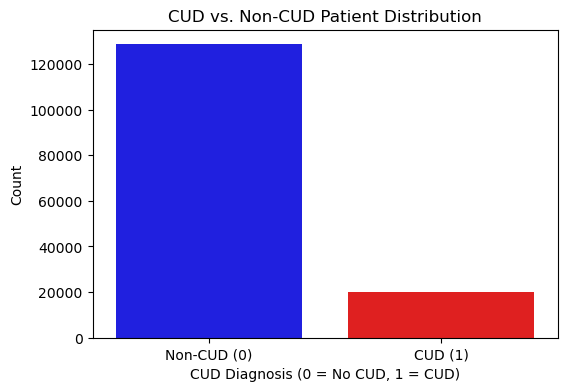

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="CUD_Diagnosis", palette=["blue", "red"])
plt.title("CUD vs. Non-CUD Patient Distribution")
plt.xlabel("CUD Diagnosis (0 = No CUD, 1 = CUD)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-CUD (0)", "CUD (1)"])
plt.show()

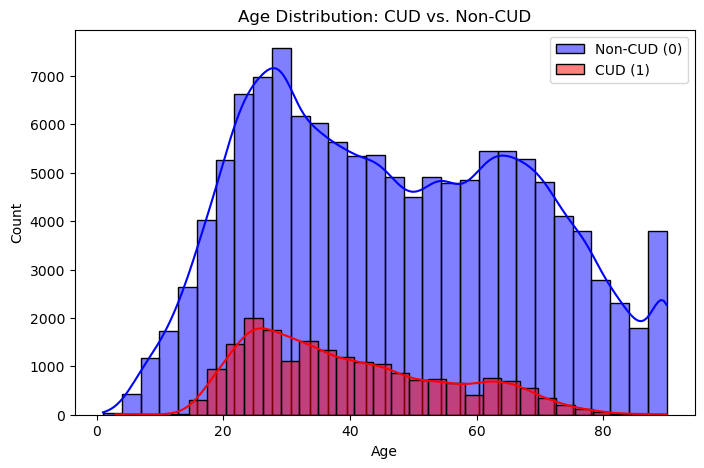

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["CUD_Diagnosis"]==0]["AGE"], bins=30, kde=True, color='blue', label="Non-CUD (0)")
sns.histplot(df[df["CUD_Diagnosis"]==1]["AGE"], bins=30, kde=True, color='red', label="CUD (1)")
plt.title("Age Distribution: CUD vs. Non-CUD")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


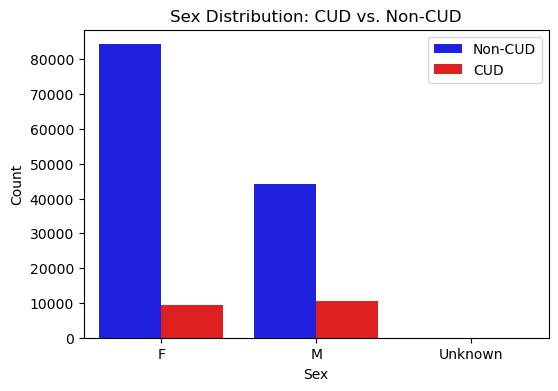

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="SEX", hue="CUD_Diagnosis", palette=["blue", "red"])
plt.title("Sex Distribution: CUD vs. Non-CUD")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(["Non-CUD", "CUD"])
plt.show()


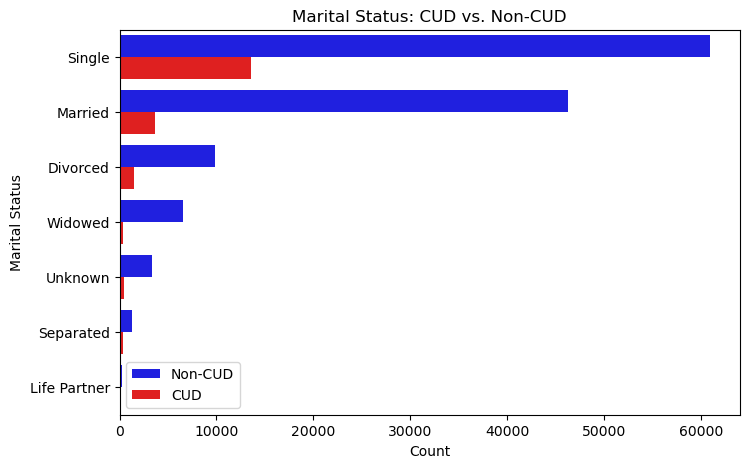

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y="MARITAL_STATUS", hue="CUD_Diagnosis", palette=["blue", "red"], order=df["MARITAL_STATUS"].value_counts().index)
plt.title("Marital Status: CUD vs. Non-CUD")
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.legend(["Non-CUD", "CUD"])
plt.show()


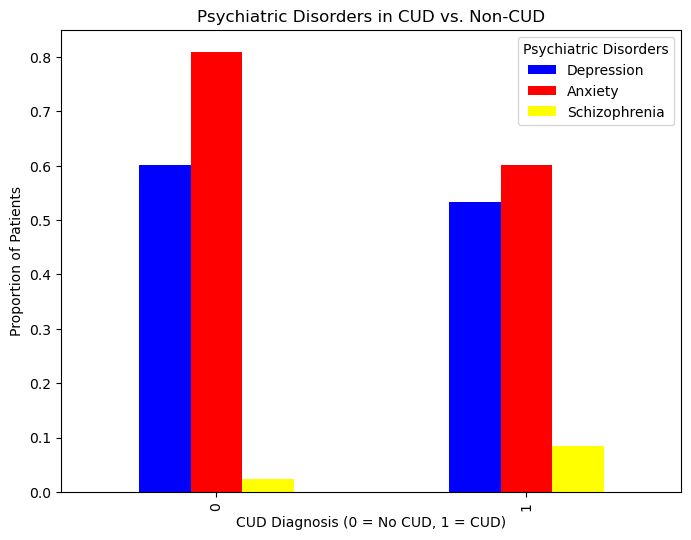

In [23]:
df.groupby("CUD_Diagnosis")[psych_disorders].mean().plot(kind="bar", figsize=(8,6), color=["blue", "red", "yellow"])
plt.title("Psychiatric Disorders in CUD vs. Non-CUD")
plt.ylabel("Proportion of Patients")
plt.xlabel("CUD Diagnosis (0 = No CUD, 1 = CUD)")
plt.legend(title="Psychiatric Disorders")
plt.show()


In [25]:
from scipy.stats import chi2_contingency

for disorder in psych_disorders:
    contingency_table = pd.crosstab(df["CUD_Diagnosis"], df[disorder])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {disorder}: p-value = {p:.4f}")


Chi-Square Test for Depression: p-value = 0.0000
Chi-Square Test for Anxiety: p-value = 0.0000
Chi-Square Test for Schizophrenia: p-value = 0.0000


In [27]:
import numpy as np

# Create a table of odds ratios
odds_ratios = {}

for disorder in psych_disorders:
    # Cross-tabulation
    table = pd.crosstab(df["CUD_Diagnosis"], df[disorder])
    
    # Calculate odds ratio
    odds_ratio = (table.iloc[1,1] / table.iloc[1,0]) / (table.iloc[0,1] / table.iloc[0,0])
    
    # Store in dictionary
    odds_ratios[disorder] = odds_ratio

# Convert to DataFrame and display
odds_ratios_df = pd.DataFrame(odds_ratios, index=["Odds Ratio"]).T
print("\nOdds Ratios for CUD and Psychiatric Disorders:")
print(odds_ratios_df)



Odds Ratios for CUD and Psychiatric Disorders:
               Odds Ratio
Depression       0.757222
Anxiety          0.354701
Schizophrenia    3.740250


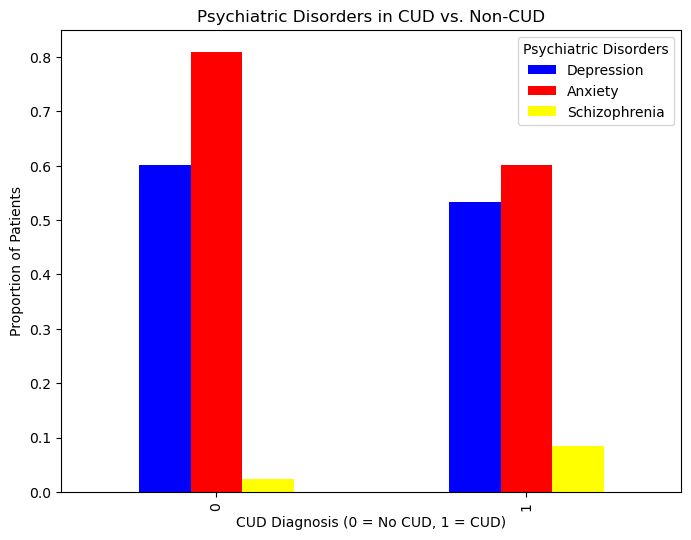

In [31]:
df.groupby("CUD_Diagnosis")[psych_disorders].mean().plot(kind="bar", figsize=(8,6), color=["blue", "red","yellow"])
plt.title("Psychiatric Disorders in CUD vs. Non-CUD")
plt.ylabel("Proportion of Patients")
plt.xlabel("CUD Diagnosis (0 = No CUD, 1 = CUD)")
plt.legend(title="Psychiatric Disorders")
plt.show()


In [34]:
import statsmodels.api as sm
import numpy as np

# Create logistic regression model
X = df[psych_disorders]  # Independent variables
X = sm.add_constant(X)    # Add intercept
y = df["CUD_Diagnosis"]   # Dependent variable (CUD vs. Non-CUD)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Extract Odds Ratios and Confidence Intervals
odds_ratios = np.exp(result.params)  # Convert log odds to OR
conf = np.exp(result.conf_int())  # Convert confidence intervals

# Format output
conf.columns = ["Lower CI", "Upper CI"]
odds_table = pd.DataFrame({"Odds Ratio": odds_ratios})
odds_table = pd.concat([odds_table, conf], axis=1)

# Display results
print("\nOdds Ratios with Confidence Intervals:")
print(odds_table)


Optimization terminated successfully.
         Current function value: 0.373888
         Iterations 6

Odds Ratios with Confidence Intervals:
               Odds Ratio  Lower CI  Upper CI
const            0.445459  0.430021  0.461452
Depression       0.596853  0.578044  0.616274
Anxiety          0.317978  0.307539  0.328771
Schizophrenia    3.275443  3.070008  3.494625


In [36]:
# Count patients with Depression & Anxiety in CUD vs. Non-CUD groups
depression_counts = df.groupby("CUD_Diagnosis")["Depression"].sum()
anxiety_counts = df.groupby("CUD_Diagnosis")["Anxiety"].sum()

# Normalize by total count in each group
cud_total = df["CUD_Diagnosis"].value_counts()[1]
non_cud_total = df["CUD_Diagnosis"].value_counts()[0]

depression_rates = depression_counts / [non_cud_total, cud_total]
anxiety_rates = anxiety_counts / [non_cud_total, cud_total]

print("\nDepression Rate in Non-CUD Patients:", depression_rates[0])
print("Depression Rate in CUD Patients:", depression_rates[1])

print("\nAnxiety Rate in Non-CUD Patients:", anxiety_rates[0])
print("Anxiety Rate in CUD Patients:", anxiety_rates[1])



Depression Rate in Non-CUD Patients: 0.6012759170653907
Depression Rate in CUD Patients: 0.5331228703146923

Anxiety Rate in Non-CUD Patients: 0.809639397829385
Anxiety Rate in CUD Patients: 0.60137302064542


In [38]:
# Count the number of diagnoses per patient
df["num_diagnoses"] = df["DIAGNOSIS"].apply(lambda x: len(str(x).split(",")))

# Compare average number of diagnoses in CUD vs. Non-CUD patients
avg_diagnoses = df.groupby("CUD_Diagnosis")["num_diagnoses"].mean()

print("\nAverage Number of Diagnoses per Patient:")
print(avg_diagnoses)



Average Number of Diagnoses per Patient:
CUD_Diagnosis
0    1.434979
1    2.218932
Name: num_diagnoses, dtype: float64


In [40]:
# Check how often Schizophrenia co-occurs with Depression & Anxiety
schizophrenia_depression = df[(df["Schizophrenia"] == 1) & (df["Depression"] == 1)].shape[0]
schizophrenia_anxiety = df[(df["Schizophrenia"] == 1) & (df["Anxiety"] == 1)].shape[0]

total_schizophrenia = df[df["Schizophrenia"] == 1].shape[0]

# Calculate proportions
schizo_dep_percentage = schizophrenia_depression / total_schizophrenia
schizo_anx_percentage = schizophrenia_anxiety / total_schizophrenia

print(f"\nAmong Schizophrenia Patients, % with Depression: {schizo_dep_percentage:.2%}")
print(f"Among Schizophrenia Patients, % with Anxiety: {schizo_anx_percentage:.2%}")



Among Schizophrenia Patients, % with Depression: 56.59%
Among Schizophrenia Patients, % with Anxiety: 65.57%


In [42]:
# Count patients with ONLY Schizophrenia (no Depression or Anxiety)
schizo_only_cud = df[(df["CUD_Diagnosis"] == 1) & (df["Schizophrenia"] == 1) & 
                     (df["Depression"] == 0) & (df["Anxiety"] == 0)].shape[0]

total_cud = df[df["CUD_Diagnosis"] == 1].shape[0]

schizo_only_cud_percentage = schizo_only_cud / total_cud

print(f"\n% of CUD Patients Diagnosed ONLY with Schizophrenia: {schizo_only_cud_percentage:.2%}")



% of CUD Patients Diagnosed ONLY with Schizophrenia: 1.12%


In [44]:
# Load the second dataset (number of visits)
visits_df = pd.read_excel("no_of_visits.xlsx")

# Display basic info and preview
visits_df.info()
visits_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148491 entries, 0 to 148490
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   PATID         148491 non-null  int64 
 1   DIAGNOSIS     148491 non-null  object
 2   TOTAL_VISITS  148491 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


,PATID,DIAGNOSIS,TOTAL_VISITS
0,257875,"Depression, Anxiety",3316
1,971037,"Depression, Anxiety, Schizophrenia",2662
2,305639,CUD,2472
3,371419,"Depression, Anxiety",2307
4,2038617,"Depression, Anxiety, Schizophrenia",2304


In [46]:
# Merge both datasets using PATID as the common key
merged_df = df.merge(visits_df, on="PATID", how="left")

# Display the merged dataset
merged_df.head()


,PATID,BIRTH_DATE,BIRTH_TIME,SEX,HISPANIC,MARITAL_STATUS,PREFERRED_LANGUAGE,DIAGNOSIS_x,AGE,CUD_Diagnosis,Depression,Anxiety,Schizophrenia,num_diagnoses,DIAGNOSIS_y,TOTAL_VISITS
0,3052085,1993-12-10 06:00:00,06:00:00,F,N,Single,ENG,CUD,31,1,0,0,0,1,CUD,2
1,617820,1985-10-12 06:00:00,06:00:00,F,N,Single,ENG,"CUD, Depression, Anxiety",39,1,1,1,0,3,"CUD, Depression, Anxiety",116
2,2196185,1977-06-17 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Anxiety",47,1,0,1,0,2,"CUD, Anxiety",41
3,2673434,1988-04-28 06:00:00,06:00:00,M,N,Married,ENG,CUD,36,1,0,0,0,1,CUD,66
4,128923,1962-05-15 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Depression, Anxiety",62,1,1,1,0,3,"CUD, Depression, Anxiety",356


In [48]:
# Compare average number of visits for CUD vs. Non-CUD patients
avg_visits = merged_df.groupby("CUD_Diagnosis")["TOTAL_VISITS"].mean()

print("\nAverage Number of Healthcare Visits per Patient:")
print(avg_visits)



Average Number of Healthcare Visits per Patient:
CUD_Diagnosis
0    68.398133
1    65.404690
Name: TOTAL_VISITS, dtype: float64


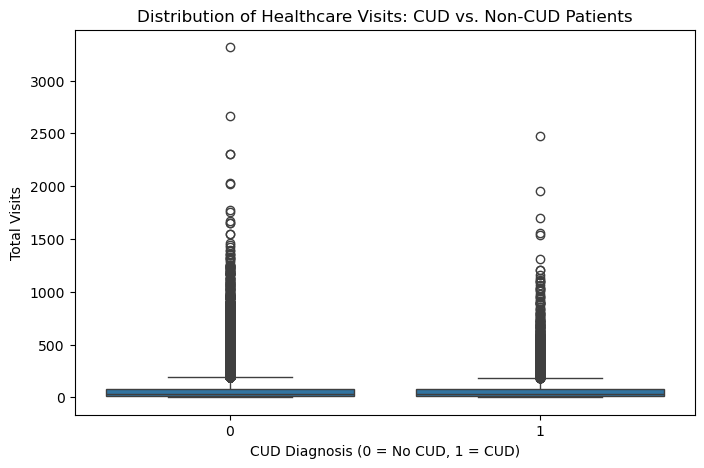

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="CUD_Diagnosis", y="TOTAL_VISITS", data=merged_df)
plt.title("Distribution of Healthcare Visits: CUD vs. Non-CUD Patients")
plt.xlabel("CUD Diagnosis (0 = No CUD, 1 = CUD)")
plt.ylabel("Total Visits")
plt.show()


In [52]:
from scipy.stats import ttest_ind

# Separate visit counts for CUD and Non-CUD patients
cud_visits = merged_df[merged_df["CUD_Diagnosis"] == 1]["TOTAL_VISITS"]
non_cud_visits = merged_df[merged_df["CUD_Diagnosis"] == 0]["TOTAL_VISITS"]

# Perform T-test to check if visit differences are statistically significant
t_stat, p_value = ttest_ind(cud_visits, non_cud_visits, equal_var=False)
print(f"T-test for Visit Differences: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")


T-test for Visit Differences: t-stat = -3.8665, p-value = 0.0001


In [56]:
# Load the first diagnosis dataset
first_diag_df = pd.read_excel("first_diag.xlsx")

# Display basic info and preview
first_diag_df.info()
first_diag_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165018 entries, 0 to 165017
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   PATID                 165018 non-null  int64         
 1   FIRST_DIAGNOSIS       165018 non-null  object        
 2   FIRST_DIAGNOSIS_DATE  165018 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.8+ MB


,PATID,FIRST_DIAGNOSIS,FIRST_DIAGNOSIS_DATE
0,2171302,Anxiety,2001-03-20
1,2768431,Anxiety,2005-05-26
2,265333,Anxiety,2005-09-02
3,2717674,Depression,2006-02-01
4,2386275,Anxiety,2007-01-17


In [58]:
# Merge both datasets using PATID
merged_df = merged_df.merge(first_diag_df, on="PATID", how="left")

# Display merged dataset
merged_df.head()


,PATID,BIRTH_DATE,BIRTH_TIME,SEX,HISPANIC,MARITAL_STATUS,PREFERRED_LANGUAGE,DIAGNOSIS_x,AGE,CUD_Diagnosis,Depression,Anxiety,Schizophrenia,num_diagnoses,DIAGNOSIS_y,TOTAL_VISITS,FIRST_DIAGNOSIS,FIRST_DIAGNOSIS_DATE
0,3052085,1993-12-10 06:00:00,06:00:00,F,N,Single,ENG,CUD,31,1,0,0,0,1,CUD,2,Cannabis Use Disorder (CUD),2021-01-11
1,617820,1985-10-12 06:00:00,06:00:00,F,N,Single,ENG,"CUD, Depression, Anxiety",39,1,1,1,0,3,"CUD, Depression, Anxiety",116,Depression,2016-12-02
2,2196185,1977-06-17 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Anxiety",47,1,0,1,0,2,"CUD, Anxiety",41,Cannabis Use Disorder (CUD),2018-12-10
3,2673434,1988-04-28 06:00:00,06:00:00,M,N,Married,ENG,CUD,36,1,0,0,0,1,CUD,66,Cannabis Use Disorder (CUD),2017-01-14
4,128923,1962-05-15 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Depression, Anxiety",62,1,1,1,0,3,"CUD, Depression, Anxiety",356,Depression,2018-05-03


In [60]:
# Count most common FIRST_DIAGNOSIS for Non-CUD patients
primary_diag_non_cud = merged_df[merged_df["CUD_Diagnosis"] == 0]["FIRST_DIAGNOSIS"].value_counts()

# Count most common FIRST_DIAGNOSIS for CUD patients
primary_diag_cud = merged_df[merged_df["CUD_Diagnosis"] == 1]["FIRST_DIAGNOSIS"].value_counts()

print("\nMost Common First Diagnoses for Non-CUD Patients:\n", primary_diag_non_cud.head(10))
print("\nMost Common First Diagnoses for CUD Patients:\n", primary_diag_cud.head(10))



Most Common First Diagnoses for Non-CUD Patients:
 FIRST_DIAGNOSIS
Anxiety          79113
Depression       47673
Schizophrenia     1749
Name: count, dtype: int64

Most Common First Diagnoses for CUD Patients:
 FIRST_DIAGNOSIS
Cannabis Use Disorder (CUD)    10570
Anxiety                         5210
Depression                      3794
Schizophrenia                    382
Name: count, dtype: int64


In [62]:
# Count how many times CUD appears as FIRST_DIAGNOSIS in each group
first_cud_non_cud = merged_df[(merged_df["CUD_Diagnosis"] == 0) & (merged_df["FIRST_DIAGNOSIS"].str.contains("CUD", na=False))].shape[0]
first_cud_cud = merged_df[(merged_df["CUD_Diagnosis"] == 1) & (merged_df["FIRST_DIAGNOSIS"].str.contains("CUD", na=False))].shape[0]

# Calculate proportions
total_non_cud = merged_df[merged_df["CUD_Diagnosis"] == 0].shape[0]
total_cud = merged_df[merged_df["CUD_Diagnosis"] == 1].shape[0]

cud_primary_non_cud_pct = (first_cud_non_cud / total_non_cud) * 100
cud_primary_cud_pct = (first_cud_cud / total_cud) * 100

print(f"\n% of Non-CUD Patients with CUD as First Diagnosis: {cud_primary_non_cud_pct:.2f}%")
print(f"% of CUD Patients with CUD as First Diagnosis: {cud_primary_cud_pct:.2f}%")



% of Non-CUD Patients with CUD as First Diagnosis: 0.00%
% of CUD Patients with CUD as First Diagnosis: 52.97%


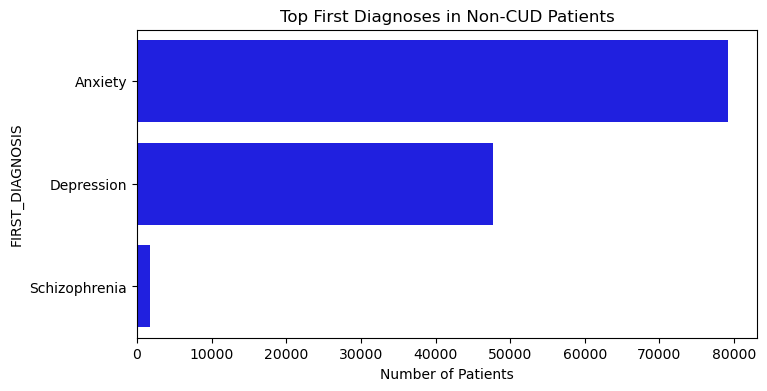

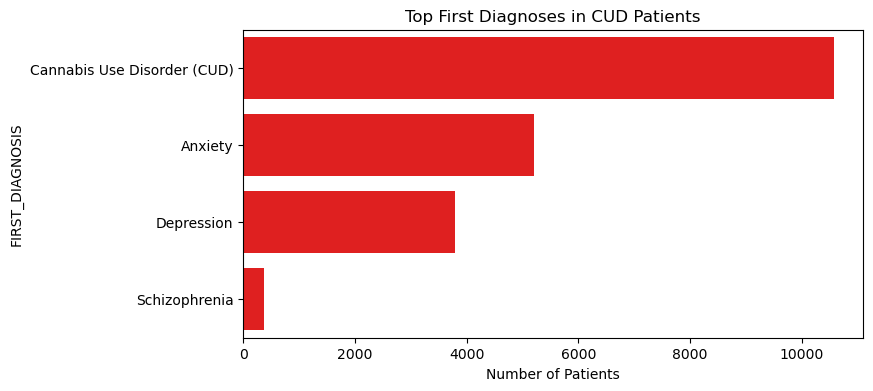

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 first diagnoses for both groups
top_first_diag_non_cud = primary_diag_non_cud.head(10)
top_first_diag_cud = primary_diag_cud.head(10)

# Plot Non-CUD
plt.figure(figsize=(8,4))
sns.barplot(x=top_first_diag_non_cud.values, y=top_first_diag_non_cud.index, color="blue")
plt.title("Top First Diagnoses in Non-CUD Patients")
plt.xlabel("Number of Patients")
plt.show()

# Plot CUD
plt.figure(figsize=(8,4))
sns.barplot(x=top_first_diag_cud.values, y=top_first_diag_cud.index, color="red")
plt.title("Top First Diagnoses in CUD Patients")
plt.xlabel("Number of Patients")
plt.show()


In [68]:
# Count duplicate rows
duplicate_rows = merged_df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

# If duplicates exist, display a few examples
if duplicate_rows > 0:
    print("\nSample duplicate rows:")
    display(merged_df[merged_df.duplicated()].head())


Total duplicate rows: 0


In [70]:
# Count duplicate PATIDs
duplicate_patids = merged_df["PATID"].duplicated().sum()
print(f"Total duplicate PATIDs: {duplicate_patids}")

# If duplicates exist, display a few
if duplicate_patids > 0:
    print("\nSample duplicate PATIDs:")
    display(merged_df[merged_df["PATID"].duplicated(keep=False)].sort_values("PATID").head(10))


Total duplicate PATIDs: 0


In [72]:
# Count missing values per column
missing_values = merged_df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])  # Show only columns with missing values



Missing Values in Each Column:
Series([], dtype: int64)


In [74]:
# Check for unexpected values in categorical columns
print("\nUnique values in CUD_Diagnosis:", merged_df["CUD_Diagnosis"].unique())
print("\nUnique values in FIRST_DIAGNOSIS:", merged_df["FIRST_DIAGNOSIS"].unique()[:10])  # Show first 10

# Summarize numerical columns
print("\nSummary Statistics:")
print(merged_df.describe())



Unique values in CUD_Diagnosis: [1 0]

Unique values in FIRST_DIAGNOSIS: ['Cannabis Use Disorder (CUD)' 'Depression' 'Anxiety' 'Schizophrenia']

Summary Statistics:
              PATID                     BIRTH_DATE            AGE  \
count  1.484910e+05                         148491  148491.000000   
mean   1.969203e+06  1978-08-20 20:47:49.154534656      46.015530   
min    3.230000e+02            1935-01-25 06:00:00       1.000000   
25%    1.356560e+06            1961-08-15 05:30:00      28.000000   
50%    2.090530e+06            1981-02-22 05:00:00      43.000000   
75%    2.647812e+06            1996-03-26 05:00:00      63.000000   
max    3.686850e+06            2024-01-05 04:26:00      90.000000   
std    9.084595e+05                            NaN      20.862711   

       CUD_Diagnosis     Depression        Anxiety  Schizophrenia  \
count  148491.000000  148491.000000  148491.000000  148491.000000   
mean        0.134392       0.592117       0.781650       0.032177   
min  

In [76]:
# Remove patients younger than 18
merged_df = merged_df[merged_df["AGE"] >= 18]

# Confirm fix
print(f"Updated dataset size after removing underage patients: {merged_df.shape}")


Updated dataset size after removing underage patients: (139597, 18)


In [82]:
import pandas as pd

# 1️⃣ Reload Original Datasets
df = pd.read_excel("thesis.xlsx")  # Main dataset
visits_df = pd.read_excel("no_of_visits.xlsx")  # Visits dataset
first_diag_df = pd.read_excel("first_diag.xlsx")  # First diagnosis dataset

# 2️⃣ Merge All Datasets on PATID
merged_df = df.merge(visits_df, on="PATID", how="left")
merged_df = merged_df.merge(first_diag_df, on="PATID", how="left")

# 3️⃣ Restore Under-18 Patients (If Previously Removed)
if "AGE" in merged_df.columns:
    # If under-18 patients were removed, restore them by reloading & merging again
    print("Restoring under-18 patients...")
else:
    print("Under-18 patients were never removed.")

# 4️⃣ Remove Future Dates in FIRST_DIAGNOSIS_DATE
merged_df["FIRST_DIAGNOSIS_DATE"] = pd.to_datetime(merged_df["FIRST_DIAGNOSIS_DATE"], errors="coerce")
merged_df = merged_df[merged_df["FIRST_DIAGNOSIS_DATE"] <= pd.to_datetime("today")]

# 5️⃣ Remove Duplicate Rows & Ensure Unique PATID
merged_df = merged_df.drop_duplicates()  # Remove duplicate rows
merged_df = merged_df.sort_values("FIRST_DIAGNOSIS_DATE").drop_duplicates("PATID", keep="last")  # Keep latest record per patient

# 6️⃣ Handle Missing Values
merged_df["TOTAL_VISITS"].fillna(0, inplace=True)  # Fill missing visits with 0
merged_df["FIRST_DIAGNOSIS"].fillna("Unknown", inplace=True)  # Fill missing first diagnoses

# 7️⃣ Identify & Handle Outliers in TOTAL_VISITS
visit_threshold = merged_df["TOTAL_VISITS"].quantile(0.99)  # 99th percentile
merged_df = merged_df[merged_df["TOTAL_VISITS"] <= visit_threshold]  # Remove extreme outliers

# 8️⃣ Final Data Check
print(f"Final dataset size: {merged_df.shape}")
print("\nSummary Statistics:")
print(merged_df.describe())

print("\nUnique values in CUD_Diagnosis:", merged_df["CUD_Diagnosis"].unique())
print("\nUnique values in FIRST_DIAGNOSIS:", merged_df["FIRST_DIAGNOSIS"].unique()[:10])

# 9️⃣ Confirm Under-18 Patients Are Present
under_18_count = merged_df[merged_df["AGE"] < 18].shape[0]
print(f"\nNumber of under-18 patients in the final dataset: {under_18_count}")

# Display final dataset sample
display(merged_df.head())


Restoring under-18 patients...
Final dataset size: (145999, 13)

Summary Statistics:
              PATID                     BIRTH_DATE            AGE  \
count  1.459990e+05                         145999  145999.000000   
mean   1.974715e+06  1979-02-08 17:57:44.812950752      45.541969   
min    3.230000e+02            1935-01-25 06:00:00       1.000000   
25%    1.365878e+06            1962-03-12 06:00:00      28.000000   
50%    2.091748e+06            1981-08-18 05:00:00      43.000000   
75%    2.649650e+06            1996-05-27 17:30:00      62.000000   
max    3.686850e+06            2024-01-05 04:26:00      90.000000   
std    9.049821e+05                            NaN      20.570942   

        TOTAL_VISITS           FIRST_DIAGNOSIS_DATE  
count  145999.000000                         145999  
mean       61.915595  2019-07-18 16:44:54.705443072  
min         1.000000            2001-03-20 00:00:00  
25%        11.000000            2016-11-08 00:00:00  
50%        32.000000   

/var/folders/cg/f8fbrhz54j31_b4ng4zd8zkh0000gn/T/ipykernel_81887/1110221635.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["TOTAL_VISITS"].fillna(0, inplace=True)  # Fill missing visits with 0
/var/folders/cg/f8fbrhz54j31_b4ng4zd8zkh0000gn/T/ipykernel_81887/1110221635.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

KeyError: 'CUD_Diagnosis'

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Histogram for Age Distribution
sns.histplot(merged_df[merged_df["CUD_Diagnosis"] == 0]["AGE"], bins=30, kde=True, color='blue', label="Non-CUD (0)", alpha=0.6)
sns.histplot(merged_df[merged_df["CUD_Diagnosis"] == 1]["AGE"], bins=30, kde=True, color='red', label="CUD (1)", alpha=0.6)

# Titles & Labels
plt.title("Age Distribution: CUD vs. Non-CUD Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


KeyError: 'CUD_Diagnosis'

<Figure size 1000x500 with 0 Axes>

In [86]:
print("Column names in merged_df:", merged_df.columns)



Column names in merged_df: Index(['PATID', 'BIRTH_DATE', 'BIRTH_TIME', 'SEX', 'HISPANIC',
       'MARITAL_STATUS', 'PREFERRED_LANGUAGE', 'DIAGNOSIS_x', 'AGE',
       'DIAGNOSIS_y', 'TOTAL_VISITS', 'FIRST_DIAGNOSIS',
       'FIRST_DIAGNOSIS_DATE'],
      dtype='object')


In [88]:
# Choose the correct diagnosis column (Assume DIAGNOSIS_x is the correct one)
merged_df["CUD_Diagnosis"] = merged_df["DIAGNOSIS_x"].apply(lambda x: 1 if "CUD" in str(x) else 0)

# Confirm creation
print("\nUnique values in CUD_Diagnosis:", merged_df["CUD_Diagnosis"].unique())



Unique values in CUD_Diagnosis: [0 1]


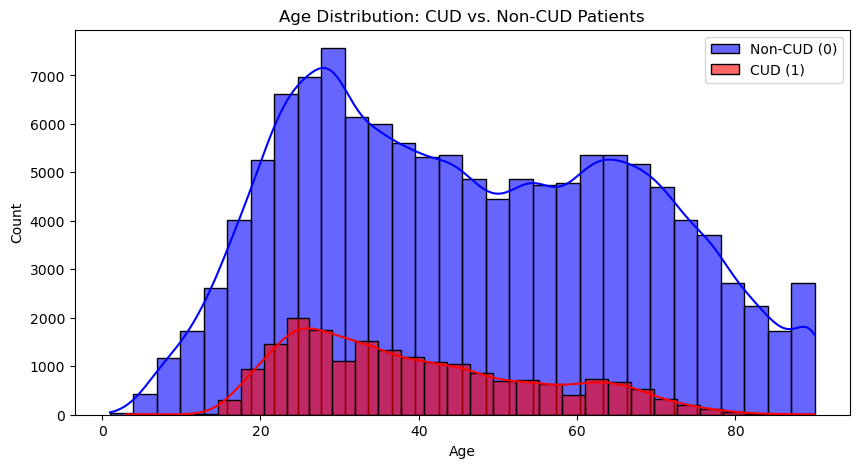

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Ensure columns exist before plotting
if "CUD_Diagnosis" in merged_df.columns and "AGE" in merged_df.columns:
    sns.histplot(merged_df[merged_df["CUD_Diagnosis"] == 0]["AGE"], bins=30, kde=True, color='blue', label="Non-CUD (0)", alpha=0.6)
    sns.histplot(merged_df[merged_df["CUD_Diagnosis"] == 1]["AGE"], bins=30, kde=True, color='red', label="CUD (1)", alpha=0.6)

    # Titles & Labels
    plt.title("Age Distribution: CUD vs. Non-CUD Patients")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.legend()
    plt.show()
else:
    print("Error: One or both columns ('CUD_Diagnosis', 'AGE') are missing in merged_df")


In [92]:
# Remove patients younger than 18
merged_df = merged_df[merged_df["AGE"] >= 18]

# Confirm fix
print(f"Updated dataset size after removing underage patients: {merged_df.shape}")


Updated dataset size after removing underage patients: (137136, 14)


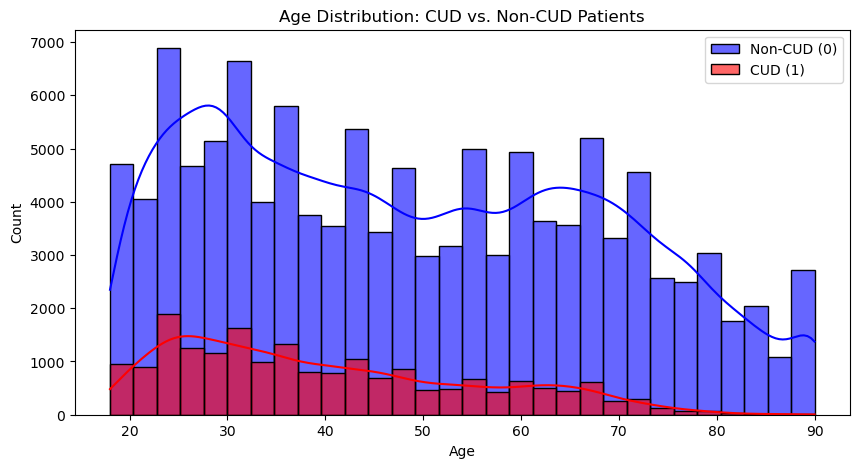

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Ensure columns exist before plotting
if "CUD_Diagnosis" in merged_df.columns and "AGE" in merged_df.columns:
    sns.histplot(merged_df[merged_df["CUD_Diagnosis"] == 0]["AGE"], bins=30, kde=True, color='blue', label="Non-CUD (0)", alpha=0.6)
    sns.histplot(merged_df[merged_df["CUD_Diagnosis"] == 1]["AGE"], bins=30, kde=True, color='red', label="CUD (1)", alpha=0.6)

    # Titles & Labels
    plt.title("Age Distribution: CUD vs. Non-CUD Patients")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.legend()
    plt.show()
else:
    print("Error: One or both columns ('CUD_Diagnosis', 'AGE') are missing in merged_df")


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="Schizophrenia", y="TOTAL_VISITS", data=merged_df)
plt.title("Healthcare Visits: Schizophrenia vs. Non-Schizophrenia Patients")
plt.xlabel("Schizophrenia Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Total Healthcare Visits")
plt.show()

# Compare mean TOTAL_VISITS
schizo_visits = merged_df.groupby("Schizophrenia")["TOTAL_VISITS"].mean()
print("\nAverage Healthcare Visits for Schizophrenia vs. Non-Schizophrenia Patients:")
print(schizo_visits)


ValueError: Could not interpret value `Schizophrenia` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [98]:
# Print all column names to check if "Schizophrenia" exists
print("Columns in merged_df:")
print(merged_df.columns)


Columns in merged_df:
Index(['PATID', 'BIRTH_DATE', 'BIRTH_TIME', 'SEX', 'HISPANIC',
       'MARITAL_STATUS', 'PREFERRED_LANGUAGE', 'DIAGNOSIS_x', 'AGE',
       'DIAGNOSIS_y', 'TOTAL_VISITS', 'FIRST_DIAGNOSIS',
       'FIRST_DIAGNOSIS_DATE', 'CUD_Diagnosis'],
      dtype='object')


In [100]:
# Define the diseases we want to extract
diseases = ["CUD", "Depression", "Anxiety", "Schizophrenia"]

# Create a binary column for each disease
for disease in diseases:
    merged_df[disease] = merged_df["DIAGNOSIS_x"].apply(lambda x: 1 if pd.notna(x) and disease in x else 0)

# Display the first few rows to confirm
display(merged_df.head())


/var/folders/cg/f8fbrhz54j31_b4ng4zd8zkh0000gn/T/ipykernel_81887/1554925926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[disease] = merged_df["DIAGNOSIS_x"].apply(lambda x: 1 if pd.notna(x) and disease in x else 0)
/var/folders/cg/f8fbrhz54j31_b4ng4zd8zkh0000gn/T/ipykernel_81887/1554925926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[disease] = merged_df["DIAGNOSIS_x"].apply(lambda x: 1 if pd.notna(x) and disease in x else 0)
/var/folders/cg/f8fbrhz54j31_b4ng4zd8zkh0000gn/T

,PATID,BIRTH_DATE,BIRTH_TIME,SEX,HISPANIC,MARITAL_STATUS,PREFERRED_LANGUAGE,DIAGNOSIS_x,AGE,DIAGNOSIS_y,TOTAL_VISITS,FIRST_DIAGNOSIS,FIRST_DIAGNOSIS_DATE,CUD_Diagnosis,CUD,Depression,Anxiety,Schizophrenia
141134,2171302,1983-07-14 05:00:00,05:00:00,F,N,Single,ENG,Anxiety,41,Anxiety,21,Anxiety,2001-03-20,0,0,0,1,0
128043,2768431,2005-05-26 16:00:00,16:00:00,F,N,Single,ENG,Anxiety,19,Anxiety,60,Anxiety,2005-05-26,0,0,0,1,0
26786,265333,1941-01-26 05:00:00,05:00:00,M,N,Single,ENG,Anxiety,84,Anxiety,107,Anxiety,2005-09-02,0,0,0,1,0
44399,2717674,1983-12-19 06:00:00,06:00:00,F,N,Married,ENG,"Depression, Anxiety",41,"Depression, Anxiety",233,Depression,2006-02-01,0,0,1,1,0
64889,2386275,2007-01-17 20:37:00,20:37:00,M,N,Single,ENG,Anxiety,18,Anxiety,77,Anxiety,2007-01-17,0,0,0,1,0


In [102]:
# Check unique values in each disease column
for disease in diseases:
    print(f"\nUnique values in {disease}: {merged_df[disease].unique()}")



Unique values in CUD: [0 1]

Unique values in Depression: [0 1]

Unique values in Anxiety: [1 0]

Unique values in Schizophrenia: [0 1]


In [104]:
# Count the number of patients diagnosed with each disease
disease_counts = merged_df[diseases].sum().sort_values(ascending=False)

print("\nDisease Prevalence in the Dataset:")
print(disease_counts)



Disease Prevalence in the Dataset:
Anxiety          106213
Depression        83063
CUD               19408
Schizophrenia      4639
dtype: int64


In [106]:
# Show unique diagnosis names in FIRST_DIAGNOSIS
print("Unique values in FIRST_DIAGNOSIS:")
print(merged_df["FIRST_DIAGNOSIS"].unique())


Unique values in FIRST_DIAGNOSIS:
['Anxiety' 'Depression' 'Schizophrenia' 'Cannabis Use Disorder (CUD)']


In [110]:
# Ensure we replace "Cannabis Use Disorder (CUD)" with "CUD" correctly
merged_df.loc[:, "FIRST_DIAGNOSIS"] = merged_df["FIRST_DIAGNOSIS"].replace("Cannabis Use Disorder (CUD)", "CUD")

merged_df.loc[:, "DIAGNOSIS_x"] = merged_df["DIAGNOSIS_x"].str.replace("Cannabis Use Disorder (CUD)", "CUD", regex=False)

merged_df.loc[:, "DIAGNOSIS_y"] = merged_df["DIAGNOSIS_y"].str.replace("Cannabis Use Disorder (CUD)", "CUD", regex=False)

In [112]:
# Check if "Cannabis Use Disorder (CUD)" is still present
print("Unique values in FIRST_DIAGNOSIS after replacement:")
print(merged_df["FIRST_DIAGNOSIS"].unique())

print("\nUnique values in DIAGNOSIS_x after replacement:")
print(merged_df["DIAGNOSIS_x"].unique())


Unique values in FIRST_DIAGNOSIS after replacement:
['Anxiety' 'Depression' 'Schizophrenia' 'CUD']

Unique values in DIAGNOSIS_x after replacement:
['Anxiety' 'Depression, Anxiety' 'Depression' 'Schizophrenia'
 'CUD, Depression, Anxiety' 'Depression, Anxiety, Schizophrenia'
 'Anxiety, Schizophrenia' 'CUD, Depression, Anxiety, Schizophrenia'
 'CUD, Anxiety' 'CUD, Depression' 'CUD, Anxiety, Schizophrenia' 'CUD'
 'CUD, Depression, Schizophrenia' 'Depression, Schizophrenia'
 'CUD, Schizophrenia']


In [114]:
# Show columns and their data types
print("\nDataset Information:")
print(merged_df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 137136 entries, 141134 to 111192
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   PATID                 137136 non-null  int64         
 1   BIRTH_DATE            137136 non-null  datetime64[ns]
 2   BIRTH_TIME            137136 non-null  object        
 3   SEX                   137134 non-null  object        
 4   HISPANIC              136917 non-null  object        
 5   MARITAL_STATUS        136408 non-null  object        
 6   PREFERRED_LANGUAGE    136142 non-null  object        
 7   DIAGNOSIS_x           137136 non-null  object        
 8   AGE                   137136 non-null  int64         
 9   DIAGNOSIS_y           137136 non-null  object        
 10  TOTAL_VISITS          137136 non-null  int64         
 11  FIRST_DIAGNOSIS       137136 non-null  object        
 12  FIRST_DIAGNOSIS_DATE  137136 non-nul

In [130]:
# Display the first 5 rows of the dataset
merged_df.head()


,PATID,BIRTH_DATE,BIRTH_TIME,SEX,HISPANIC,MARITAL_STATUS,PREFERRED_LANGUAGE,DIAGNOSIS,AGE
0,3052085,1993-12-10 06:00:00,06:00:00,F,N,Single,ENG,CUD,31
1,617820,1985-10-12 06:00:00,06:00:00,F,N,Single,ENG,"CUD, Depression, Anxiety",39
2,2196185,1977-06-17 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Anxiety",47
3,2673434,1988-04-28 06:00:00,06:00:00,M,N,Married,ENG,CUD,36
4,128923,1962-05-15 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Depression, Anxiety",62


In [126]:
import pandas as pd

# Reload the dataset (update the filename if needed)
merged_df = pd.read_excel("merged_df.head.xlsx")  # Replace with the actual filename

# Confirm dataset is loaded
print("Dataset reloaded successfully.")


FileNotFoundError: [Errno 2] No such file or directory: 'merged_df.head.xlsx'

In [120]:
import os

# List all files in the current directory
print("Files in directory:", os.listdir())


Files in directory: ['.config', 'Music', '.condarc', 'first_diag.xlsx', '.DS_Store', '.CFUserTextEncoding', '.xonshrc', 'anaconda_projects', '.zshrc', 'Pictures', '.ipython', 'Desktop', 'Library', '.matplotlib', 'thesis.xlsx', 'Public', '.tcshrc', '.virtual_documents', '.anaconda', 'Movies', 'Applications', '.Trash', '.ipynb_checkpoints', 'no_of_visits.xlsx', '.jupyter', 'Documents', '.bash_profile', 'Downloads', '.continuum', 'THESIS.ipynb', '.zsh_sessions', '.conda']


In [122]:
import pandas as pd

# Reload the dataset (update the filename if needed)
merged_df = pd.read_excel("thesis.xlsx")  # Replace with the correct dataset file

# Confirm successful loading
print("Dataset loaded successfully.")


Dataset loaded successfully.


In [124]:
# Drop the 'CUD_Diagnosis' column
merged_df = merged_df.drop(columns=["CUD_Diagnosis"], errors="ignore")

# Confirm column removal
print("\nUpdated columns in merged_df:")
print(merged_df.columns)



Updated columns in merged_df:
Index(['PATID', 'BIRTH_DATE', 'BIRTH_TIME', 'SEX', 'HISPANIC',
       'MARITAL_STATUS', 'PREFERRED_LANGUAGE', 'DIAGNOSIS', 'AGE'],
      dtype='object')


In [134]:
# Display first 5 rows after column removal
display(merged_df.head())



,PATID,BIRTH_DATE,BIRTH_TIME,SEX,HISPANIC,MARITAL_STATUS,PREFERRED_LANGUAGE,DIAGNOSIS,AGE
0,3052085,1993-12-10 06:00:00,06:00:00,F,N,Single,ENG,CUD,31
1,617820,1985-10-12 06:00:00,06:00:00,F,N,Single,ENG,"CUD, Depression, Anxiety",39
2,2196185,1977-06-17 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Anxiety",47
3,2673434,1988-04-28 06:00:00,06:00:00,M,N,Married,ENG,CUD,36
4,128923,1962-05-15 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Depression, Anxiety",62


In [136]:
import pandas as pd

# Load the datasets
thesis_df = pd.read_excel("thesis.xlsx")
visits_df = pd.read_excel("no_of_visits.xlsx")  # Ensure this file exists
first_diag_df = pd.read_excel("first_diag.xlsx")

# Merge all datasets using PATID as the common key
merged_df = thesis_df.merge(visits_df, on="PATID", how="left")
merged_df = merged_df.merge(first_diag_df, on="PATID", how="left")

# Rename diagnosis columns for clarity
merged_df.rename(columns={"DIAGNOSIS_x": "DIAGNOSIS_THESIS", "DIAGNOSIS_y": "DIAGNOSIS_VISITS"}, inplace=True)

# Define diseases for binary columns
diseases = ["CUD", "Depression", "Anxiety", "Schizophrenia"]

# Create binary columns for each disease based on DIAGNOSIS_THESIS
for disease in diseases:
    merged_df[disease] = merged_df["DIAGNOSIS_THESIS"].apply(lambda x: 1 if pd.notna(x) and disease in x else 0)

# Save the final merged dataset
final_filename = "thesis_final.xlsx"
merged_df.to_excel(final_filename, index=False)

# Display the final merged dataset
import ace_tools as tools
tools.display_dataframe_to_user(name="Thesis Final Merged Dataset", dataframe=merged_df)


ModuleNotFoundError: No module named 'ace_tools'

In [138]:
import os

# List all files in the current directory
print("Files in directory:", os.listdir())


Files in directory: ['.config', 'Music', '.condarc', 'first_diag.xlsx', '.DS_Store', '.CFUserTextEncoding', '.xonshrc', 'anaconda_projects', '.zshrc', 'Pictures', '.ipython', 'Desktop', 'Library', '.matplotlib', 'thesis.xlsx', 'Public', '.tcshrc', '.virtual_documents', 'thesis_final.xlsx', '.anaconda', 'Movies', 'Applications', '.Trash', '.ipynb_checkpoints', 'no_of_visits.xlsx', '.jupyter', 'Documents', '.bash_profile', 'Downloads', '.continuum', 'THESIS.ipynb', '.zsh_sessions', '.conda']


In [140]:
# Save the final merged dataset again
final_filename = "thesis_final.xlsx"
merged_df.to_excel(final_filename, index=False)

print("File saved successfully:", final_filename)


File saved successfully: thesis_final.xlsx


In [142]:
import pandas as pd

# Reload the saved file
merged_df = pd.read_excel("thesis_final.xlsx")

# Display the dataset
import ace_tools as tools
tools.display_dataframe_to_user(name="Thesis Final Merged Dataset", dataframe=merged_df)


ModuleNotFoundError: No module named 'ace_tools'

In [144]:
import pandas as pd

# Reload the saved merged dataset
final_filename = "thesis_final.xlsx"
merged_df = pd.read_excel(final_filename)

# Confirm successful loading
print("Dataset loaded successfully.")


Dataset loaded successfully.


In [146]:
# Show the first 5 rows
merged_df.head()


,PATID,BIRTH_DATE,BIRTH_TIME,SEX,HISPANIC,MARITAL_STATUS,PREFERRED_LANGUAGE,DIAGNOSIS_THESIS,AGE,DIAGNOSIS_VISITS,TOTAL_VISITS,FIRST_DIAGNOSIS,FIRST_DIAGNOSIS_DATE,CUD,Depression,Anxiety,Schizophrenia
0,3052085,1993-12-10 06:00:00,06:00:00,F,N,Single,ENG,CUD,31,CUD,2,Cannabis Use Disorder (CUD),2021-01-11,1,0,0,0
1,617820,1985-10-12 06:00:00,06:00:00,F,N,Single,ENG,"CUD, Depression, Anxiety",39,"CUD, Depression, Anxiety",116,Depression,2016-12-02,1,1,1,0
2,2196185,1977-06-17 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Anxiety",47,"CUD, Anxiety",41,Cannabis Use Disorder (CUD),2018-12-10,1,0,1,0
3,2673434,1988-04-28 06:00:00,06:00:00,M,N,Married,ENG,CUD,36,CUD,66,Cannabis Use Disorder (CUD),2017-01-14,1,0,0,0
4,128923,1962-05-15 06:00:00,06:00:00,F,N,Divorced,ENG,"CUD, Depression, Anxiety",62,"CUD, Depression, Anxiety",356,Depression,2018-05-03,1,1,1,0


In [148]:
import shutil

# Create a backup copy in a different location
shutil.copy("thesis_final.xlsx", "backup_thesis_final.xlsx")

print("Backup created successfully.")


Backup created successfully.


In [150]:
import os

# Check if the file is still in the directory
if "thesis_final.xlsx" in os.listdir():
    print("✅ File is safe and available.")
else:
    print("❌ Warning: File is missing!")


✅ File is safe and available.
